## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharmaceutical_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pharmaceutical_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
pharmaceutical_data["Mouse ID"].nunique()

249

In [3]:
# Find duplicate on Mouse ID and Timepoint
duplicatedRows = pharmaceutical_data[pharmaceutical_data.duplicated(['Mouse ID', 'Timepoint'])]

# Getting the duplicate mice by ID number
duplicate_mouse_id = duplicatedRows.loc[:, "Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_data = pharmaceutical_data.loc[pharmaceutical_data["Mouse ID"] == "g989"]
duplicated_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_pharmaceutical_data = pharmaceutical_data.loc[pharmaceutical_data["Mouse ID"] != "g989"]
cleaned_pharmaceutical_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_pharmaceutical_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg_tumor_volume = cleaned_pharmaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
avg_tumor_volume

tumor_volume_median = cleaned_pharmaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_median

tumor_volume_var = cleaned_pharmaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_var

tumor_volume_std = cleaned_pharmaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std

tumor_volume_sem = cleaned_pharmaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({"Mean Tumor Volume (mm3)" : round(avg_tumor_volume,2),
                             "Tumor Volume Median (mm3)" : round(tumor_volume_median,2),
                             "Tumor Volume Variance" : round(tumor_volume_var,2),
                             "Tumor Volume Standard Deviation" : round(tumor_volume_std,2),
                             "Tumor Volume SEM" : round(tumor_volume_sem,2)})
summary_table

,Mean Tumor Volume (mm3),Tumor Volume Median (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_pharmaceutical_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

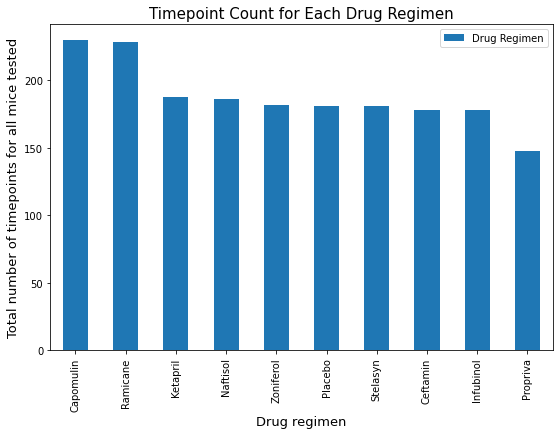

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = pd.DataFrame(cleaned_pharmaceutical_data["Drug Regimen"].value_counts())
mice_count

mice_count_plot = mice_count.plot(kind = "bar", figsize = (9, 6))
plt.title("Timepoint Count for Each Drug Regimen", size = 15)
plt.xlabel("Drug regimen", size = 13)
plt.ylabel("Total number of timepoints for all mice tested", size = 13)
plt.show()

In [11]:
mice_count.reset_index(inplace=True)
mice_count = mice_count.rename(columns = {'index':'Drug Regimen', "Drug Regimen":"Count"})
mice_count

,Drug Regimen,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


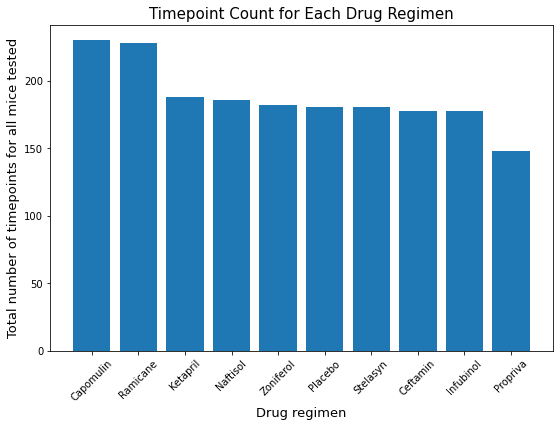

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize = (9, 6))
plt.bar(mice_count["Drug Regimen"], mice_count["Count"])
plt.xticks(rotation = 45)
plt.title("Timepoint Count for Each Drug Regimen", size = 15)
plt.xlabel("Drug regimen", size = 13)
plt.ylabel("Total number of timepoints for all mice tested", size = 13)
plt.show()

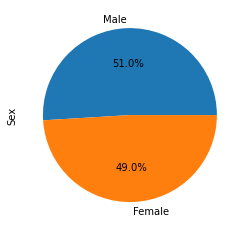

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = cleaned_pharmaceutical_data["Sex"].value_counts()
gender_count

gender_count_plot = gender_count.plot.pie(autopct= "%1.1f%%")
plt.show()


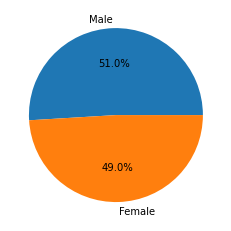

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(gender_count, labels=labels,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
cleaned_pharmaceutical_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = cleaned_pharmaceutical_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint.head()

last_timepoint_data = pd.merge(last_timepoint, cleaned_pharmaceutical_data, on = (["Mouse ID", "Timepoint"]), how = "left")
last_timepoint_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment = last_timepoint_data.loc[last_timepoint_data["Drug Regimen"] == i]
    tumor_vol_list.append(treatment["Tumor Volume (mm3)"])
       
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

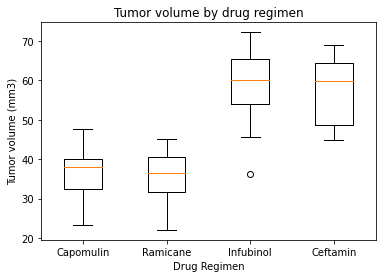

In [58]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volume by drug regimen')
ax1.set_ylabel('Tumor volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_list, labels = treatments)
plt.show()

## Line and Scatter Plots

In [92]:
cleaned_pharmaceutical_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Text(0.5, 1.0, 'Capomulin treatment of mouse s185')

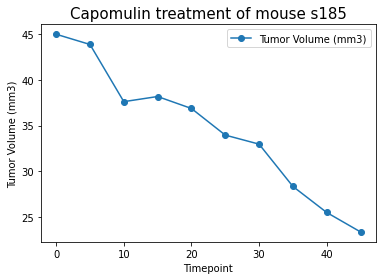

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_pharmaceutical_data.loc[cleaned_pharmaceutical_data["Drug Regimen"] == "Capomulin"]
Capomulin_df
mouse_s185 = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]
mouse_s185

mouse_s185.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)", marker="o")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185", size = 15)

Text(0.5, 1.0, 'Average tumor volume (mm3) VS. Weight (g)')

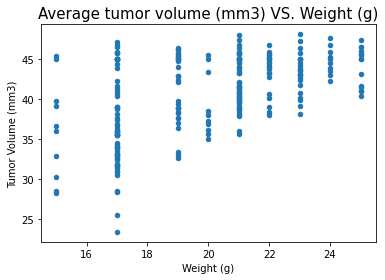

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plot1 = Capomulin_df.plot.scatter(x="Weight (g)", y = "Tumor Volume (mm3)")
plt.title("Average tumor volume (mm3) VS. Weight (g)", size = 15)

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_df["Weight (g)"], Capomulin_df["Tumor Volume (mm3)"])


The correlation coefficient for mouse weight and average tumor volume is 0.53.


The correlation coefficient for mouse weight and average tumor volume is 0.53.


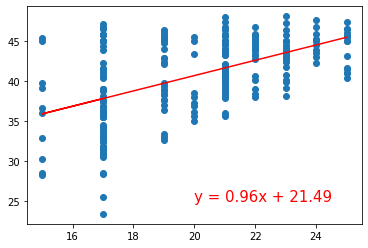

In [48]:
# linear regression model 
x_val = Capomulin_df["Weight (g)"] 
y_val = Capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

print(f"The correlation coefficient for mouse weight and average tumor volume is {round(correlation[0], 2)}.")
plt.show()